## Exercícios de Classificação
**Lista 3**

Para este exercício, será utilizado o dataset de sobreviventes do titanic. Os dados já
encontram-se separados em arquivos de treino (train.csv) e teste (test.csv). Neste dataset,
encontram-se informações como sexo, idade, classe socio-ecônomica, entre outras. Abaixo,
você encontra o dicionário dos dados, contendo a descrição do que cada atributo e seus
respectivos valores representam.

1. Execute uma análise exploratória dos dados. Elabore gráficos, calcule estatísticas e
obtenha inferências iniciais sobre os dados. Discorra sobre as inferências realizadas.

2. Realize o pré-processamento dos dados. Faça as limpezas e formatações que julgar
necessárias para obter um conjunto de dados consistente. (Dica: você pode juntar os
dois arquivos de dados em um único dataframe para facilitar a manipulação!).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
#from pandas_profiling import ProfileReport

**Carrengando o dataset de treino**

In [10]:
df_test = pd.read_csv('https://raw.githubusercontent.com/hinessacaminha/mentoring-ml/main/exercicios/classificacao/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hinessacaminha/mentoring-ml/main/exercicios/classificacao/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Concatenando os dois DFs (df_test e df_train)**

Nesta etapa foi necessário juntar os DFs para melhorar a exploração e limpeza dos dados. Para isso, utilizamos a função do pandas `concat` e o parâmetro `ignore_index` com valor `True` para garantir que não haveria a repetição dos índices . Observa-se que nessa junção a coluna `Survived` ficou à direta e com vários valores NaN, isto ocorreu porque esta coluna não constava no `df_test` e os valores de suas linhas foram separados das colunas, significa dizer que parte dos seus valores estão nas linhas e parte nas colunas. Provavelmente esta não é a melhor solução para junção destes Dfs. Em todo caso iremos tratar os NaN das colunas e continuar com essa abordagem.

In [12]:
df_unido = pd.concat([df_test, df_train], ignore_index=True)
df_unido.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


**Estudar como usa o Profiling**

*Visão Geral do DF com `pandas_profiling`*

*Função do Python que exibe todas as estatísticas*

In [13]:
#profile = ProfileReport(df_unido)
#profile.to_notebook_iframe()

In [14]:
# exibindo as colunas do DF após unir o df_test e df_train
df_unido.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [15]:
# Definindo a coluna PassengerId como índice
#df = df_unido.set_index('PassengerId', inplace=False) # coloquei a coluna PassengerId como índice
#df

In [16]:
df_unido['Survived'] 
# porque estes dados ficaram como float e não inteiro?
# observando o arquivo de treino todas as células estão preenchidas o que não justifica a presença desses NaN que são interpretados 
# desta forma quando as células não possuem valores.

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [17]:
# verificando se há NaN e somando todos por coluna
df_unido.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

*Calculando o percentual de NaN nas colunas em relação ao total de linhas. Isto ajuda a verificar o impacto da ausência 
(caso opte por dropar) na análise dessas informações para a regra de negócio.*

In [18]:
# Soma dos valores NaN em relação as linhas (por isso o shape está setado em 0), multiplicado por 100
df_unido.isnull().sum()/df_unido.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
Survived       31.932773
dtype: float64

*A coluna `Survived` é importante para a análise da questão 3, logo precisamos ter cuidado ao decidir o que será feito com os NaN. Provavelmente não deverá ser eliminada e deveremos optar pela a técnica de "imputação múltipla" que consite em substituir o NaN por uma valor mais recorrente na coluna do DF*

**Eliminando colunas**

*No caso desta coluna o mais recomendado seria eleminá-la uma vez que tem mais de 70% de NaN. Substituir os valores não seria uma boa opção, pois iria apenas "mascarar" as informações desta feature e poderia prejudicar as predições* 

In [19]:
df_unido.drop(columns = ['Ticket','Fare','Cabin','Name'], inplace = True)
df_unido.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,male,34.5,0,0,Q,NaN
1,893,3,female,47.0,1,0,S,NaN
2,894,2,male,62.0,0,0,Q,NaN
3,895,3,male,27.0,0,0,S,NaN
4,896,3,female,22.0,1,1,S,NaN


In [20]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Embarked     1307 non-null   object 
 7   Survived     891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


**Tratando os NaN**

*Utilizamos a técnica de imputação única através da função `SimpleImputer` da biblioteca do Sklearn com o parâmetro `strategy` definido por `mean` ,isto é, média. Para isso precisamos importar no módulo `impute` o `SimpleImputer`.*

In [21]:
from sklearn.impute import SimpleImputer 

# substituição dos valores NaN pela estratégia da média para a coluna Survived
most_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

*Para aplicar a estratégia `SimpleImputer` para a substituição na coluna é necessário fazer a combinação com `fit_transform`*

In [22]:
# substituição dos valores NaN pela estratégia da média combinado com fit_transform 
df_unido.Survived = most_imputer.fit_transform(df_unido[['Survived']])
df_unido.Age = mean_imputer.fit_transform(df_unido[['Age']])
# substituição dos valores NaN pela estratégia da média para a coluna Embarked, pois é a estratégia recomendada para feature categórica
most_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_unido.Embarked = most_imputer.fit_transform(df_unido[['Embarked']])
# o sample também funciona como o .head(), porém as linhas são aleatórias ao contrário do primeiro que me retorna as 5 primeiras linhas do DF.
df_unido.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
1225,808,3,female,18.000000,0,0,S,0.0
620,203,3,male,34.000000,0,0,S,0.0
371,1263,1,female,31.000000,0,0,C,0.0
62,954,3,male,18.000000,0,0,S,0.0
716,299,1,male,29.881138,0,0,S,1.0


**Análise do uso do SimpleImputer**

*A estratégia da média no caso da coluna Survived não é a mais indicada, uma vez que irá gerar uma terceira coluna ao plotar o histograma na análise de sobreviventes por sexo. Além de preencher com valores muito que irão gerar erros e não informarão corretamente, pois não existe por exemplo o valor de 0.38 de vida ou morte, isto é ou é 0 (morto) ou é 1(vivo). Com isso, optei por mudar para a estratégia de mais frequente para esta feature. Se observarmos a plotagem do novo histograma veremos que a estratégia de `most_frequent` mostrou melhor análise e não gerou uma terceira coluna com os dados separados da feature `Suvived`*

*Removendo a linha que contém o NaN na coluna Fare. Como é apenas um único dado e não ultrapassa de 10% da base de dados 
então este procedimento não se torna prejudicial para as análises*

In [23]:
# Armazenando em uma variável a remoção da linha que contém o NaN. O inplace setado como "False" para não aplicar a remoção no df_unido
df_clean = df_unido.dropna(axis=0, inplace = False)
df_unido.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,male,34.5,0,0,Q,0.0
1,893,3,female,47.0,1,0,S,0.0
2,894,2,male,62.0,0,0,Q,0.0
3,895,3,male,27.0,0,0,S,0.0
4,896,3,female,22.0,1,1,S,0.0


In [24]:
# Calculando o percentual de NaN no df_clean, somente para visualizar se a remoção da linha que tinha NaN deu certo. 
df_clean.isnull().sum()/df_clean.shape[0]*100

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Embarked       0.0
Survived       0.0
dtype: float64

In [25]:
df_unido.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Survived       float64
dtype: object

## Análise Exploratória dos Dados (AED)

In [26]:
df_unido.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Survived       float64
dtype: object

In [27]:
df_unido.duplicated().value_counts()

False    1309
dtype: int64

In [28]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Embarked     1309 non-null   object 
 7   Survived     1309 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [29]:
df_unido.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,0.261268
std,378.020061,0.837836,12.883193,1.041658,0.865560,0.439494
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,0.000000
50%,655.000000,3.000000,29.881138,0.000000,0.000000,0.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,1.000000


In [30]:
df_unido.corr('pearson')

,PassengerId,Pclass,Age,SibSp,Parch,Survived
PassengerId,1.000000,-0.038354,0.025731,-0.055224,0.008942,-0.331493
Pclass,-0.038354,1.000000,-0.366371,0.060832,0.018322,-0.244686
Age,0.025731,-0.366371,1.000000,-0.190747,-0.130872,-0.060203
SibSp,-0.055224,0.060832,-0.190747,1.000000,0.373587,-0.014375
Parch,0.008942,0.018322,-0.130872,0.373587,1.000000,0.054908
Survived,-0.331493,-0.244686,-0.060203,-0.014375,0.054908,1.000000


<AxesSubplot:title={'center':'Sobreviventes por idade'}, ylabel='Frequency'>

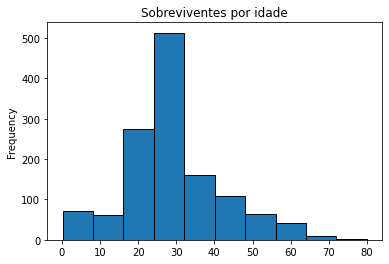

In [31]:
df_unido['Age'].plot.hist(edgecolor='black', title= 'Sobreviventes por idade')

<AxesSubplot:title={'center':'Sobreviventes por classe (1ª, 2ª, 3ª)'}, ylabel='Frequency'>

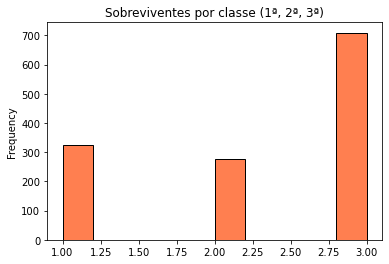

In [32]:
df_unido['Pclass'].plot.hist(edgecolor='black', title= 'Sobreviventes por classe (1ª, 2ª, 3ª)', color= 'coral')

<AxesSubplot:title={'center':'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic'}, ylabel='Frequency'>

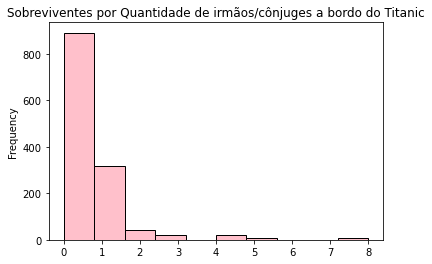

In [33]:
df_unido['SibSp'].plot.hist(edgecolor='black', title= 'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic', color= 'pink')

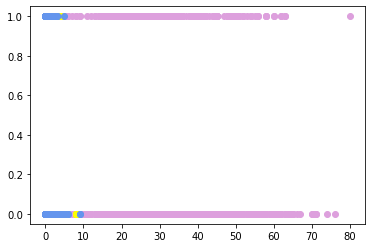

In [34]:
#gráfico de dispersão 
plt.scatter(df_unido['Pclass'], df_unido['Survived'], color= 'green')
plt.scatter(df_unido['Age'], df_unido['Survived'], color = 'Plum')
plt.scatter(df_unido['SibSp'], df_unido['Survived'], color = 'yellow')
plt.scatter(df_unido['Parch'], df_unido['Survived'], color = 'CornflowerBlue')

In [35]:
# agrupando por sexo
colunas_selecionadas = ['Sex', 'Survived']

In [36]:
df_titanic = df_unido.filter(items=colunas_selecionadas)

In [37]:
df_titanic.head()

,Sex,Survived
0,male,0.0
1,female,0.0
2,male,0.0
3,male,0.0
4,female,0.0


In [38]:
df_titanic.groupby(by=["Sex"]).count()

,Survived
Sex,
female,466
male,843


array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

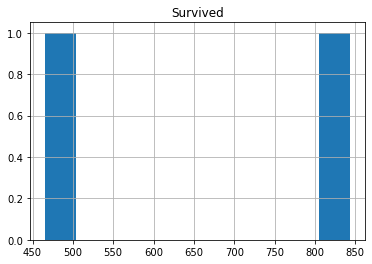

In [39]:
# Mulherese x homens que sobreviveram 
df_titanic.groupby(by=["Sex"]).count().hist()

In [40]:
df_titanic.groupby(by=["Sex"]).describe()

Survived                                           
          count    mean       std  min  25%  50%  75%  max
Sex                                                       
female    466.0  0.5000  0.500537  0.0  0.0  0.5  1.0  1.0
male      843.0  0.1293  0.335731  0.0  0.0  0.0  0.0  1.0

In [41]:
# transformando os dados das colunas Sex, Embarked em int ou float 

**Atribuindo valores numéricos à coluna "Sex"**

1 = male

2 = female

In [42]:
df_unido.loc[df_unido.Sex=='male','Sex'] = 1
df_unido.loc[df_unido.Sex=='female','Sex'] = 2

<AxesSubplot:title={'center':'Sobreviventes por Sexo'}, ylabel='Frequency'>

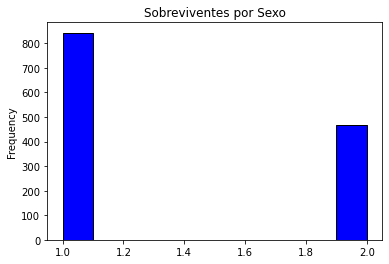

In [43]:
df_unido['Sex'].plot.hist(edgecolor='black', title= 'Sobreviventes por Sexo', color= 'blue')

**Atribuindo valores numéricos à coluna "Embarked"**

3 = C - Cherbourg

4 = Q - Queenstown

5 = S - Southampton

In [44]:
df_unido.loc[df_unido.Embarked=='S','Embarked'] = 3
df_unido.loc[df_unido.Embarked=='C','Embarked'] = 4
df_unido.loc[df_unido.Embarked=='Q','Embarked'] = 5

In [45]:
df_unido.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,5,0.0
1,893,3,2,47.0,1,0,3,0.0
2,894,2,1,62.0,0,0,5,0.0
3,895,3,1,27.0,0,0,3,0.0
4,896,3,2,22.0,1,1,3,0.0


**Verificando os tipos de dados das colunas**

In [46]:
df_unido.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Survived       float64
dtype: object

<AxesSubplot:title={'center':'Sobreviventes por Porto de Embarque'}, ylabel='Frequency'>

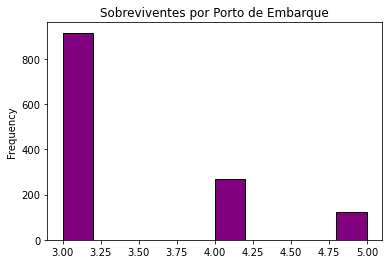

In [47]:
df_unido['Embarked'].plot.hist(edgecolor='black', title= 'Sobreviventes por Porto de Embarque', color= 'purple')

*Segundo o histograma acima a maior quantidade de sobreviventes do Titanic partiu do porto de `Cherbourg (3.00)`*

**Tranformando os dados das colunas Sex, Embarked e Survived (`float`) em dados do tipo `int`**

In [48]:
df_unido['Sex']= df_unido['Sex'].astype(int)
df_unido['Embarked'] = df_unido['Embarked'].astype(int)
df_unido['Survived'] = df_unido['Survived'].astype(int)
df_unido

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.500000,0,0,5,0
1,893,3,2,47.000000,1,0,3,0
2,894,2,1,62.000000,0,0,5,0
3,895,3,1,27.000000,0,0,3,0
4,896,3,2,22.000000,1,1,3,0
...,...,...,...,...,...,...,...,...
1304,887,2,1,27.000000,0,0,3,0
1305,888,1,2,19.000000,0,0,3,1
1306,889,3,2,29.881138,1,2,3,0
1307,890,1,1,26.000000,0,0,4,1


In [49]:
df_unido.dtypes()

TypeError: 'Series' object is not callable


**Dividindo o dataset em treino e teste**

In [50]:
# Separando as colunas exceto a Survived que será o y
X = df_unido[df_unido.columns[:-1]]
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.500000,0,0,5
1,893,3,2,47.000000,1,0,3
2,894,2,1,62.000000,0,0,5
3,895,3,1,27.000000,0,0,3
4,896,3,2,22.000000,1,1,3
...,...,...,...,...,...,...,...
1304,887,2,1,27.000000,0,0,3
1305,888,1,2,19.000000,0,0,3
1306,889,3,2,29.881138,1,2,3
1307,890,1,1,26.000000,0,0,4


In [51]:
# Separando os dados que irei estimar
y = df_unido[df_unido.columns[-1:]]
y

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
1304,0
1305,1
1306,0
1307,1


In [52]:
[X_train, X_test, y_train, y_test]= train_test_split(X, y,test_size = 0.3, random_state=2)

In [53]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
886,469,3,1,29.881138,0,0,5
293,1185,1,1,53.000000,1,1,3
1207,790,1,1,46.000000,0,0,4
658,241,3,2,29.881138,1,0,4
1094,677,3,1,24.500000,0,0,3
...,...,...,...,...,...,...,...
18,910,3,2,27.000000,1,0,3
1034,617,3,1,34.000000,1,1,3
155,1047,3,1,24.000000,0,0,3
600,183,3,1,9.000000,4,2,3


Padronizando os dados em uma mesma escala

In [75]:
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)
scaled = scaler.transform(X_test)
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
886,469,3,1,29.881138,0,0,5
293,1185,1,1,53.000000,1,1,3
1207,790,1,1,46.000000,0,0,4
658,241,3,2,29.881138,1,0,4
1094,677,3,1,24.500000,0,0,3
...,...,...,...,...,...,...,...
18,910,3,2,27.000000,1,0,3
1034,617,3,1,34.000000,1,1,3
155,1047,3,1,24.000000,0,0,3
600,183,3,1,9.000000,4,2,3


3. Crie um classificador para predizer se um passageiro sobreviveu ou não a partir dos
atributos presentes no dataset. Utilize os algoritmos KNN, Regressão Logística e
Naive Bayes para criar os modelos. Crie um modelo para cada algoritmo.

## **Regressão Logística**

In [83]:
log_reg = LogisticRegression()
model_reg = log_reg.fit(X_train,y_train)
pred_log_reg = model_reg.predict(X_test)
print("Regressão Logística:", model_reg.score(X_test, y_test))

Regressão Logística: 0.8371501272264631


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## **KNN**

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
model_knn = knn.fit(X_train,y_train)
pred_knn = model_knn.predict(X_test)
print("KNN:", model_knn.score(X_test, y_test))

KNN: 0.6997455470737913


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Acurácia**

In [79]:
accuracy_score(y_test, pred_log_reg)

0.8371501272264631

**Kappa**

In [80]:
print("Kappa:", metrics.cohen_kappa_score(y_test, pred_log_reg))

Kappa: 0.5413064886749097


**F1**

In [81]:
print("Todas:", metrics.precision_recall_fscore_support(y_test, pred_log_reg))

Todas: (array([0.84210526, 0.81428571]), array([0.95438596, 0.52777778]), array([0.89473684, 0.64044944]), array([285, 108], dtype=int64))


## **Naive Bayes**

In [60]:
naive = MultinomialNB()
model_naive = naive.fit(X_train,y_train)
pred_naive = model_naive.predict(X_test)
print("Naive Bayes:", model_naive.score(X_test, y_test))

Naive Bayes: 0.6361323155216285


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## **Matriz de Confusão**

In [61]:
matrix = metrics.confusion_matrix(y_test, pred_log_reg)
matrix_bayes = metrics.confusion_matrix(y_test, pred_naive)
matrix_knn = metrics.confusion_matrix(y_test, pred_knn)

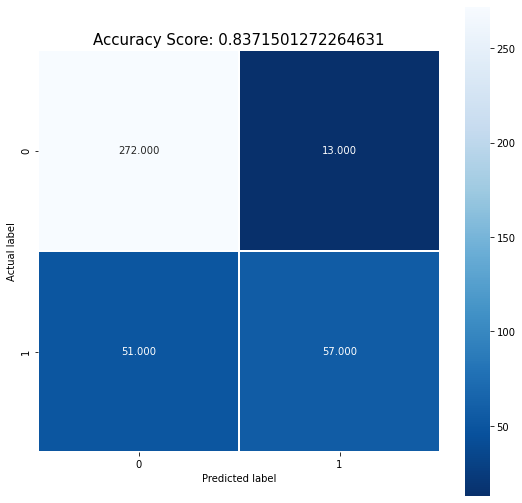

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_reg.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

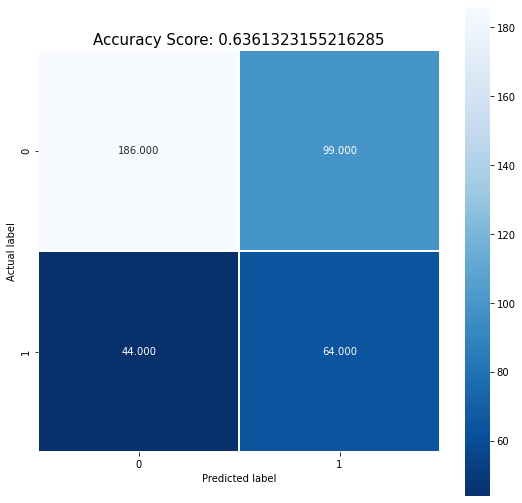

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(matrix_bayes, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_naive.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

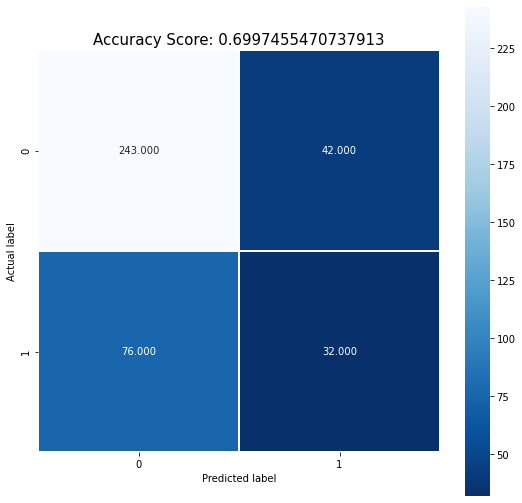

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(matrix_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

**Referências Bibliográficas**

https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/

https://medium.com/data-hackers/tratamento-e-transforma%C3%A7%C3%A3o-de-dados-nan-uma-vis%C3%A3o-geral-e-pr%C3%A1tica-54efa9fc7a98

https://www.youtube.com/watch?v=ojA65o8N0iM&t=684s

https://datatofish.com/check-nan-pandas-dataframe/

http://www.each.usp.br/lauretto/SIN5008_2011/aula01/aula1#:~:text=A%20%EF%AC%81nalidade%20da%20An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20%28AED%29,digita%C3%A7%C3%A3o%20de%20dados%20em%20um%20banco%20de%20dados

https://pypi.org/project/pandas-profiling/

https://www.youtube.com/watch?v=TRatkPjzHNE

https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/#:~:text=Uma%20das%20maneiras%20de%20fazer%20a%20divis%C3%A3o%20desses,dos%20dados%20para%20treino%20e%2030%25%20para%20teste.

https://minerandodados.com.br/7-tipos-graficos-cientista-de-dados/

https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn